# Demo of khipu plots

- Goal: quick illustration of the khipugram 
- Citation: Li, S. and Zheng, S., 2023. Generalized tree structure to annotate untargeted metabolomics and stable isotope tracing data. Analytical chemistry, 95(15), pp.6212-6217. (https://pubs.acs.org/doi/10.1021/acs.analchem.2c05810)
- Original repo: https://github.com/shuzhao-li-lab/khipu


**Note**

This notebook is run on $docker run -v /Users/shuzhao/play:/home/jovyan -p 8888:8888 jupyter/scipy-notebook

This is similar to run in terminal: `python3 -m khipu.test`

Shuzhao Li, 2022-12-25

In [1]:
!pip install --upgrade khipu-metabolomics

Requirement already up-to-date: khipu-metabolomics in /opt/conda/lib/python3.7/site-packages (0.4.8)


In [2]:
import matplotlib.pyplot as plt
from khipu.test import *

In [3]:
# Variables imported
print([x for x in dir() if x[0] != '_'])

['In', 'Khipu', 'Out', 'PROTON', 'Weavor', 'add_data_to_tag', 'adduct_search_patterns', 'adduct_search_patterns_neg', 'assign_masstrack_ids_in_khipu', 'build_centurion_tree', 'curve_fit', 'electron', 'exit', 'export_empCpd_khipu_list', 'export_json_khipu_list', 'export_json_trees', 'export_tsv_trees', 'extend_khipu_list', 'extended_adducts', 'find_all_matches_centurion_indexed_list', 'find_trees_by_datatag', 'find_trees_by_datatag_list', 'get_adduct_edge_pairs', 'get_ipython', 'get_isotope_pattern_name', 'get_isotopic_edge_pairs', 'is_datatag_in_tree', 'isotope_search_patterns', 'json', 'khipu_annotate', 'khipu_diagnosis', 'local_read_file', 'make_edge_tag', 'make_expected_adduct_index', 'make_peak_dict', 'make_peak_tag', 'np', 'nx', 'pd', 'peak_dict_to_khipu_list', 'peaks_to_networks', 'plt', 'quit', 'read_features_from_text', 'realign_isotopes', 'realign_isotopes_reverse', 'rt_compared_by_values', 'rt_matched_by_tolerance', 'test_read_url', 'treelib', 'urllib']


In [4]:
# Read test feature table into khipu package
subnetworks, peak_dict, edge_dict = test_read_url()
print(len(subnetworks), len(peak_dict))

Retrieving test data from GitHub.
table header looks like:  ['id_number', 'mz', 'rtime', '12C_Ecoli_20220321_004', '12C_Ecoli_20220321_004_20220322095030', '12C_Ecoli_20220321_004_20220322130235', '13C_Ecoli_20220321_004', '13C_Ecoli_20220321_004_20220322132355', '13C_Ecoli_20220321_004_20220322101150']
Read 3602 feature lines
504 3602


In [5]:
# Have a look at peak data structure
print(list(peak_dict.items())[55:57])

[('F56', {'id': 'F56', 'mz': 97.1013, 'rtime': 66.21, 'intensities': [3138738.0, 2184196.0, 1433236.0, 3032564.0, 1719115.0, 1937016.0], 'representative_intensity': 2240810.8333333335}), ('F57', {'id': 'F57', 'mz': 134.0909, 'rtime': 24.15, 'intensities': [0.0, 0.0, 0.0, 527014.0, 654599.0, 545435.0], 'representative_intensity': 287841.3333333333})]


In [6]:
# Have a look at default ion patterns
print(isotope_search_patterns)
print(adduct_search_patterns)

[(1.003355, '13C/12C', (0, 0.8)), (2.00671, '13C/12C*2', (0, 0.8)), (3.010065, '13C/12C*3', (0, 0.8)), (4.01342, '13C/12C*4', (0, 0.8)), (5.016775, '13C/12C*5', (0, 0.8)), (6.02013, '13C/12C*6', (0, 0.8)), (7.023485, '13C/12C*7', (0, 0.8)), (8.02684, '13C/12C*8', (0, 0.8)), (9.030195, '13C/12C*9', (0, 0.8)), (10.03355, '13C/12C*10', (0, 0.8)), (11.036905, '13C/12C*11', (0, 0.8)), (12.04026, '13C/12C*12', (0, 0.8))]
[(21.982, 'Na/H'), (41.026549, 'ACN'), (35.9767, 'HCl'), (37.955882, 'K/H')]


In [7]:
# initiate Weavor class
WV = Weavor(peak_dict, isotope_search_patterns, adduct_search_patterns, 
                mz_tolerance_ppm=5, mode='pos')
print(WV.mzgrid)

                 M+H+       Na/H        HCl        K/H        ACN
M0           1.007276  22.989276  36.983976  38.963158  42.033825
13C/12C      2.010631  23.992631  37.987331  39.966513  43.037180
13C/12C*2    3.013986  24.995986  38.990686  40.969868  44.040535
13C/12C*3    4.017341  25.999341  39.994041  41.973223  45.043890
13C/12C*4    5.020696  27.002696  40.997396  42.976578  46.047245
13C/12C*5    6.024051  28.006051  42.000751  43.979933  47.050600
13C/12C*6    7.027406  29.009406  43.004106  44.983288  48.053955
13C/12C*7    8.030761  30.012761  44.007461  45.986643  49.057310
13C/12C*8    9.034116  31.016116  45.010816  46.989998  50.060665
13C/12C*9   10.037471  32.019471  46.014171  47.993353  51.064020
13C/12C*10  11.040826  33.022826  47.017526  48.996708  52.067375
13C/12C*11  12.044181  34.026181  48.020881  50.000063  53.070730
13C/12C*12  13.047536  35.029536  49.024236  51.003418  54.074085


(array([424.,  56.,  15.,   4.,   2.,   2.,   1.]),
 array([ 2,  4,  6,  8, 10, 12, 20, 30]),
 <a list of 7 Patch objects>)

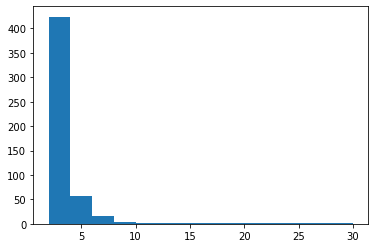

In [8]:
# distribution of input network sizes
sizes = [n.number_of_nodes() for n in subnetworks]
plt.hist(sizes, bins=[2, 4, 6, 8, 10, 12, 20, 30])

In [9]:
# choose one of the bigger groups to build demo khipu
list_sizes = [
    (ii, sizes[ii]) for ii in range(len(sizes)) if sizes[ii] > 8
]

print(list_sizes[:20])

[(3, 9), (27, 30), (50, 14), (81, 10), (82, 9), (118, 13), (171, 9), (183, 9), (228, 11)]


In [10]:
# subnetworks will have different numbers in each run. Here we choose a larger one for demo
G = subnetworks[9]
G.edges(data=True)

EdgeDataView([('F279', 'F2793', {'type': 'isotope', 'tag': '13C/12C*4'}), ('F52', 'F99', {'type': 'isotope', 'tag': '13C/12C'}), ('F52', 'F922', {'type': 'isotope', 'tag': '13C/12C*4'}), ('F52', 'F1009', {'type': 'isotope', 'tag': '13C/12C*3'}), ('F52', 'F1120', {'type': 'isotope', 'tag': '13C/12C'}), ('F52', 'F2793', {'type': 'isotope', 'tag': '13C/12C'}), ('F99', 'F922', {'type': 'isotope', 'tag': '13C/12C*5'}), ('F99', 'F1009', {'type': 'isotope', 'tag': '13C/12C*4'}), ('F99', 'F1120', {'type': 'isotope', 'tag': '13C/12C*2'}), ('F1009', 'F922', {'type': 'isotope', 'tag': '13C/12C'}), ('F1009', 'F1120', {'type': 'isotope', 'tag': '13C/12C*2'}), ('F1120', 'F922', {'type': 'isotope', 'tag': '13C/12C*3'})])

In [11]:
# examine one example khipu on subnetworks[9]
# The khipu_diagnosis class has a few extra functions than khipu main class
KP = khipu_diagnosis(G)
KP.build_khipu(WV)

In [12]:
# Redundant features are set aside during khipu construction
KP.show_trimming()

nodes_to_use:  ['F279', 'F52', 'F99', 'F1009', 'F1120', 'F2793', 'F922']
redundant_nodes:  []


In [13]:
# minimal tree view of the edges
KP.build_diagnostic_tree_clean()

Minimal khipu tree: 
130.05@25.7
└── 134.0635@25.7
    ├── 131.0533@25.7
    ├── 133.0598@25.7
    ├── 133.0608@25.1
    │   └── 137.0743@24.8
    └── 135.0667@25.7



In [14]:
# the khipu in grid view, via simple text, compatible with terminals
KP.print()

            M+H+
M0          F922
13C/12C    F1009
13C/12C*3  F2793
13C/12C*4    F52
13C/12C*5    F99
13C/12C*7   F279


In [15]:
# rotated view
KP.print2()

        M0 13C/12C 13C/12C*3 13C/12C*4 13C/12C*5 13C/12C*7
M+H+  F922   F1009     F2793       F52       F99      F279


In [16]:
KP.build_khipu_tree()

Aligned khipu tree: 
129.043
└── M+H+
    ├── 130.05@25.7
    ├── 131.0533@25.7
    ├── 133.0608@25.1
    ├── 134.0635@25.7
    ├── 135.0667@25.7
    └── 137.0743@24.8



In [17]:
# Look at another compound
G = subnetworks[118]

KP = khipu_diagnosis(G)
KP.build_khipu(WV)

In [18]:
KP.build_khipu_tree()

Aligned khipu tree: 
187.1686
├── ACN
├── HCl
├── K/H
│   ├── 226.1318@21.5
│   └── 235.1621@21.5
├── M+H+
│   ├── 188.1759@20.6
│   ├── 189.1792@20.6
│   ├── 190.1826@20.6
│   ├── 191.1859@20.6
│   ├── 192.1893@20.8
│   ├── 193.1927@20.8
│   ├── 194.196@20.8
│   ├── 196.2028@20.8
│   └── 197.2061@20.6
└── Na/H
    ├── 210.1578@20.6
    └── 219.1881@21.3



In [19]:
KP.khipu_grid

,M+H+,Na/H,HCl,K/H,ACN
M0,F2353,F3209,,F3269,
13C/12C,F1331,,,,
13C/12C*2,F1397,,,,
13C/12C*3,F1434,,,,
13C/12C*4,F1461,,,,
13C/12C*5,F1507,,,,
13C/12C*6,F1550,,,,
13C/12C*7,,,,,
13C/12C*8,F1685,,,,
13C/12C*9,F1741,F1454,,F1883,


In [20]:
KP.print3()

,M+H+,Na/H,HCl,K/H,ACN
M0,188.176,210.158,,226.132,
13C/12C,189.179,,,,
13C/12C*2,190.183,,,,
13C/12C*3,191.186,,,,
13C/12C*4,192.189,,,,
13C/12C*5,193.193,,,,
13C/12C*6,194.196,,,,
13C/12C*7,,,,,
13C/12C*8,196.203,,,,
13C/12C*9,197.206,219.188,,235.162,


In [21]:
KP.get_khipu_intensities()

,M+H+,Na/H,HCl,K/H,ACN
M0,2.529945e+07,163826.833333,0.0,278655.666667,0.0
13C/12C,2.229457e+06,0.000000,0.0,0.000000,0.0
13C/12C*2,2.214622e+06,0.000000,0.0,0.000000,0.0
13C/12C*3,1.198928e+05,0.000000,0.0,0.000000,0.0
13C/12C*4,2.858817e+05,0.000000,0.0,0.000000,0.0
13C/12C*5,2.355958e+06,0.000000,0.0,0.000000,0.0
13C/12C*6,7.429862e+05,0.000000,0.0,0.000000,0.0
13C/12C*7,0.000000e+00,0.000000,0.0,0.000000,0.0
13C/12C*8,1.783273e+06,0.000000,0.0,0.000000,0.0
13C/12C*9,1.639578e+07,94556.333333,0.0,205383.500000,0.0


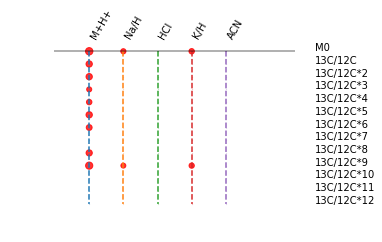

In [22]:
KP.plot_khipu_diagram()

In [23]:
# extend khipu
unassigned_peaks = [v for x,v in peak_dict.items() if x not in KP.nodes_to_use]
mztree =  build_centurion_tree(unassigned_peaks)
KP.extended_search(mztree, extended_adducts)
print("extended khipu with additional adducts: ")
KP.print()

extended khipu with additional adducts: 
             M+H+   Na/H HCl    K/H ACN M+H+,Na2/H2
M0          F2353  F3209      F3269                
13C/12C     F1331                                  
13C/12C*2   F1397                                  
13C/12C*3   F1434                                  
13C/12C*4   F1461                                  
13C/12C*5   F1507                                  
13C/12C*6   F1550                                  
13C/12C*7                                          
13C/12C*8   F1685                             F2000
13C/12C*9   F1741  F1454      F1883                
13C/12C*10                                         
13C/12C*11                                         
13C/12C*12                                         


In [24]:
KP.feature_map

{'F1685': ('13C/12C*8', 'M+H+'),
 'F1397': ('13C/12C*2', 'M+H+'),
 'F1331': ('13C/12C', 'M+H+'),
 'F2353': ('M0', 'M+H+'),
 'F1507': ('13C/12C*5', 'M+H+'),
 'F3209': ('M0', 'Na/H'),
 'F3269': ('M0', 'K/H'),
 'F1454': ('13C/12C*9', 'Na/H'),
 'F1461': ('13C/12C*4', 'M+H+'),
 'F1741': ('13C/12C*9', 'M+H+'),
 'F1434': ('13C/12C*3', 'M+H+'),
 'F1883': ('13C/12C*9', 'K/H'),
 'F1550': ('13C/12C*6', 'M+H+'),
 'F2000': ('13C/12C*8', 'M+H+,Na2/H2')}

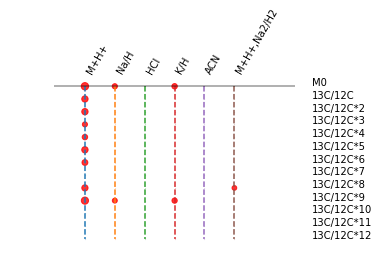

In [25]:
KP.plot_khipu_diagram()

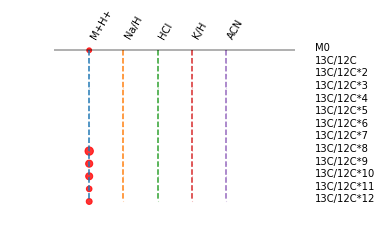

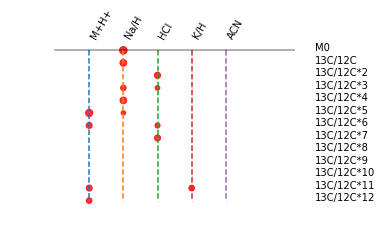

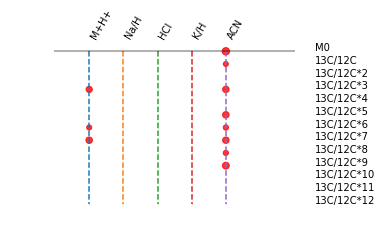

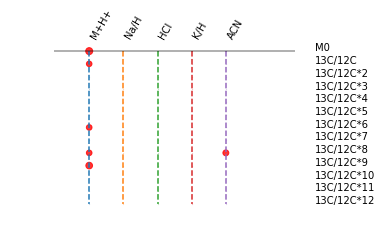

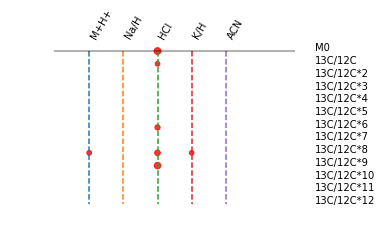

In [26]:
# plot a few more

for x in list_sizes[:5]:
    KP = Khipu(subnetworks[x[0]])
    KP.build_khipu(WV)
    KP.plot_khipu_diagram()


# Summary

This notebook demonstrates the internal data structures of khipu and basic visualization plots.